# Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación) [semana 3]

**Mario Javier Soriano Aguilera A01384282**

In [94]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [95]:
!cp /content/gdrive/MyDrive/InteligenciaArtificial/MachineLearning/LogReg/MachineLearning.py .

In [96]:
import pandas as pd
import numpy as np
import MachineLearning
from MachineLearning import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

El data set a utilizar contiene informacion sobre caracteristicas del cancer y el tipo de diagnostico en el que se registro.

In [97]:
df = pd.read_csv('/content/gdrive/MyDrive/InteligenciaArtificial/MachineLearning/LogReg/Cancer_Data.csv')

In [98]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Limpieza de datos. Se observa que mis datos tienen 33 columnas y 569 filas. Ademas de contener valores nulos en toda una columna que ni siquiera tiene nombre, la cual se eliminara por que no brinda valor alguno

In [99]:
len(df)

569

In [100]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [101]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

Se observa el tipo de dato y vemos que tenemos la variable diagnosis que es tipo object y todos los demas valores numericos float64, usaremos la variable categorica diagnosis como nuestro target de prediccion.

In [102]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [103]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Text(0.5, 0, 'Make of the cars')

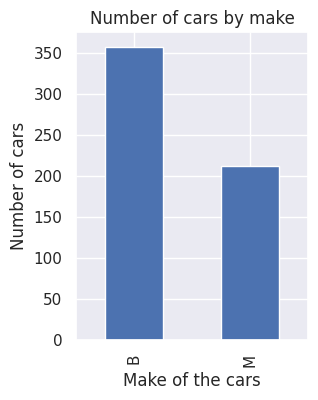

In [104]:
df.diagnosis.value_counts().plot(kind='bar', figsize=(3,4))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make of the cars')

<Axes: >

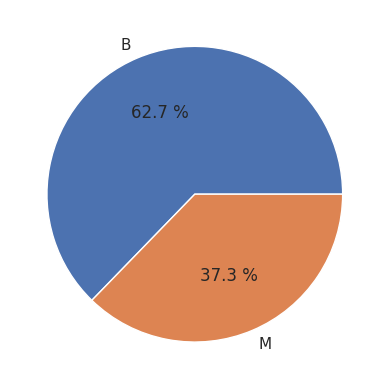

In [105]:
df.groupby('diagnosis').size().plot(kind='pie', autopct="%0.1f %%",labels = ['B', 'M'])

In [106]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [107]:
Tcorrelation = df.corr(method='pearson')
Tcorrelation

<ipython-input-107-6004b698a5e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Tcorrelation = df.corr(method='pearson')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [108]:
c = df.corr()
threshold = .80
np.abs(c.values) > threshold
[f"{c.columns[i]} and {c.columns[j]}" for i, j in zip(*np.where(np.abs(c.values) > threshold)) if i < j]

<ipython-input-108-82f4f33533eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


['radius_mean and perimeter_mean',
 'radius_mean and area_mean',
 'radius_mean and concave points_mean',
 'radius_mean and radius_worst',
 'radius_mean and perimeter_worst',
 'radius_mean and area_worst',
 'texture_mean and texture_worst',
 'perimeter_mean and area_mean',
 'perimeter_mean and concave points_mean',
 'perimeter_mean and radius_worst',
 'perimeter_mean and perimeter_worst',
 'perimeter_mean and area_worst',
 'area_mean and concave points_mean',
 'area_mean and area_se',
 'area_mean and radius_worst',
 'area_mean and perimeter_worst',
 'area_mean and area_worst',
 'smoothness_mean and smoothness_worst',
 'compactness_mean and concavity_mean',
 'compactness_mean and concave points_mean',
 'compactness_mean and compactness_worst',
 'compactness_mean and concavity_worst',
 'compactness_mean and concave points_worst',
 'concavity_mean and concave points_mean',
 'concavity_mean and concavity_worst',
 'concavity_mean and concave points_worst',
 'concave points_mean and radius_wo

En lo anterior basicamente solo se realizo una matriz de correlacion ya que tenemos muchos labels y solo queremos valores significativos, de forma rapida se analizaron con una matris de correlacion, se realizo una matriz booleana de esa matriz de correlacion y se le pusieron las etiquetas para poder identificar a simple vista cuales son las variables y con cual otra tienen alta correlacion, en este caso se escogio correlacion de .7, y se escogieron las que mas se repetian ya que son las que mas variables pueden representar.

In [109]:
labels = df[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean', 'texture_mean']]

In [110]:
X = labels
y = df['diagnosis'] = np.where(df['diagnosis']=='M',1,0)


In [111]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=1234)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(learningRate=.001, nIterations=1000)


In [113]:
clf.fit(X_train, y_train)

In [114]:
loss_history = clf.get_loss_history()
for epoch, loss in enumerate(loss_history):
    print(f'Época {epoch + 1}: Pérdida = {loss}')

Época 1: Pérdida = 0.6931471805599453
Época 2: Pérdida = 0.6924878500145304
Época 3: Pérdida = 0.6918298924637538
Época 4: Pérdida = 0.6911733049803563
Época 5: Pérdida = 0.6905180846365425
Época 6: Pérdida = 0.6898642285040499
Época 7: Pérdida = 0.6892117336542172
Época 8: Pérdida = 0.6885605971580524
Época 9: Pérdida = 0.687910816086301
Época 10: Pérdida = 0.6872623875095129
Época 11: Pérdida = 0.6866153084981101
Época 12: Pérdida = 0.6859695761224539
Época 13: Pérdida = 0.6853251874529106
Época 14: Pérdida = 0.6846821395599179
Época 15: Pérdida = 0.6840404295140514
Época 16: Pérdida = 0.6834000543860894
Época 17: Pérdida = 0.6827610112470786
Época 18: Pérdida = 0.6821232971683979
Época 19: Pérdida = 0.6814869092218248
Época 20: Pérdida = 0.6808518444795963
Época 21: Pérdida = 0.6802181000144768
Época 22: Pérdida = 0.6795856728998175
Época 23: Pérdida = 0.6789545602096217
Época 24: Pérdida = 0.6783247590186068
Época 25: Pérdida = 0.6776962664022663
Época 26: Pérdida = 0.6770690794369

In [115]:

y_pred = clf.predict(X_test)

def accuracy(yPredicted, yReal):
   return np.sum(yPredicted == yReal)/len(yReal)

acc = accuracy(y_pred, y_test)
print(acc)

0.8947368421052632


Se obtuvo un accuracy del .83 de forma obvia hay cuestiones a mejorar ya que se realizo un analisis superficial a los datos y seria buena idea realizar un analisis estadistico mas profundo sobre las variables a emplear en nuestro modelo para que pueda disernir mejor nuestros datos. Como por ejemplo ver como se distribuyen, boxplot, variables con colinealidad a nuestro modelo, pruebas de normalidad, tranformaciones, etc.

# Explicación del Modelo

El código (from MachineLearning import LogisticRegression )define una clase de regresión logística que tiene los siguientes métodos:

**sigmoid**: es una función que calcula el valor de la función sigmoide para un número x. La función sigmoide es una función que toma valores entre 0 y 1 y se usa para modelar la probabilidad de una clase binaria, en este caso M (maligno) y B (benigno) que son como se clasifican a los tipos de cancer dependiendo de sus caracteristicas y riesgos que pueda causar al que lo porta.

**init**: es el constructor de la clase que inicializa los atributos de la instancia, como la tasa de aprendizaje, el número de iteraciones, los pesos y el sesgo del modelo. Los pesos y el sesgo son los parámetros que se van a aprender mediante el ajuste del modelo a los datos, osea el fit.

**fit**: es el método que ajusta el modelo a los datos de entrenamiento X y y. Para ello, utiliza un algoritmo de descenso de gradiente que actualiza los pesos y el sesgo en cada iteración, minimizando la función de costo logística. El método también calcula la pérdida promedio en cada iteración. En este caso se estableció que los pesos empiecen en ceros.

**predict**: es el método que hace predicciones para nuevos datos X. Para ello, calcula la regresión lineal con los pesos y el sesgo aprendidos, y luego aplica la función sigmoide para obtener las probabilidades de cada clase. Luego, asigna una etiqueta de clase 0 o 1 según si la probabilidad es menor o mayor que 0.5, respectivamente. El método devuelve una lista de predicciones de clase.

**accuracy**: calcula la precisión de las predicciones de un modelo de clasificación, mide la cantidad de valores predecidos que fueron acertados con los reales, y se divide entre el numero de valores totales.

# ¿Por qué Regresion logistica?
En lo personal me interesaba aprender la formula y llevar acabo un modelo no tan simple pero tampoco tan complicado para poder llevarlo a practica, osea se escogio primero el modelo y luego se busco un dataset adecuado para poder hacer la implementacion.

# ¿Por qué se dice que el dataset es adecuado para Regresion Logistica?
Porque este tipo de modelo es utilizado cuando se quiere hacer una clasificacion binaria, osea mi variable respuesta tiene que ser categorica y binaria, en este caso cancer maligno o benigno, ademas de tener  labels numericos con los que el modelo de regresion logistica puede utilizar para relaizar mi clasificacion. Tambien puede hacer predicciones teniendo como variables explicativas categoricas, y en ese caso se tendrian que emplear tecnicas como variables dummies, las cuales indican la presencia o ausencia de cada categoria.
